In [2]:
import pandas as pd
import pandas as pd
from matplotlib import pyplot
import statsmodels as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import statistics
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from statsmodels.tsa.arima_model import ARIMA
import itertools

In [3]:
df = pd.read_csv('mapped.csv')

In [5]:
df = df.rename(columns={'Project_Number': 'Project Number', 'Project_Name' : 'Project Name'})

In [8]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df['Project Number'] = df['Project Number'].astype('str') 
df['Fiscal Period Code'] = pd.to_datetime(df['Fiscal Period Code'], format='%Y%m') 

In [11]:
len(df)

2179046

In [5]:
df['Ultimate Customer AUS Market Sector'].unique()

array([nan, 'Municipalities/Local Govt.', 'State/Regional Government',
       'Central/Federal Government', 'Chemicals', 'Life Sciences',
       'Mining & Metals', 'Commercial Developers', 'Rail', 'Technology',
       'Power Companies/Utilities', 'Automotive', 'Oil & Gas',
       'Fin. Institutions/Investors', 'Consumer Goods & Retail',
       'Conglomerates', 'Water Companies/Utilities', 'Aerospace',
       'Unspecified', 'Education', 'Ports/Transportation', 'Non-Rail',
       'Other Private', 'Healthcare', 'Institutional Agencies',
       'Intercompany'], dtype=object)

In [6]:
df['Division Short Name'].unique()

array(['Environment', 'Enabling Function', 'Water', 'Infrastructure',
       'Buildings'], dtype=object)

In [9]:
df_gov = df[df['Ultimate Customer AUS Market Sector'] == 'State/Regional Government']
len(df_gov)

12654

In [10]:
df_gov['Project Number'].nunique()

754

In [16]:
## create a dataframe for the analysis, where we only keep the last Project Numbers
df1 = (df.drop_duplicates(subset='Project Number', keep= 'last').reset_index(drop=True))
len(df1)

63522

In [17]:
def analysis(column):
    print(df1[column].unique())
    sub = df1.groupby(column).count()
    # plot the dataframe 
    return sub.plot(y=["Project Number"], kind="bar", figsize=(9, 8))

### What are the most common contract types?

['Cost plus Fixed Fee' 'Time and Material with cap' 'Lump Sum'
 'Time and Material' 'H' 'Unspecified' 'Lump Sum with IFRS'
 'Revenue group']


<AxesSubplot:xlabel='Contract Type Name'>

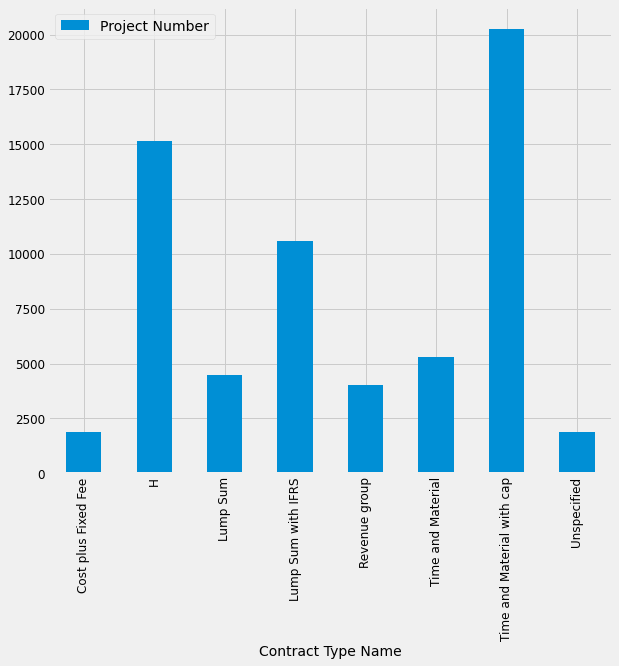

In [18]:
analysis('Contract Type Name')

### Which are the most common customer market sectors?

[nan 'Commercial Developers' 'Oil & Gas' 'Power Companies/Utilities'
 'Fin. Institutions/Investors' 'Chemicals' 'State/Regional Government'
 'Ports/Transportation' 'Rail' 'Consumer Goods & Retail'
 'Water Companies/Utilities' 'Municipalities/Local Govt.' 'Technology'
 'Conglomerates' 'Mining & Metals' 'Education' 'Automotive'
 'Life Sciences' 'Intercompany' 'Healthcare' 'Central/Federal Government'
 'Unspecified' 'Other Private' 'Aerospace' 'Institutional Agencies'
 'Non-Rail']


<AxesSubplot:xlabel='Ultimate Customer AUS Market Sector'>

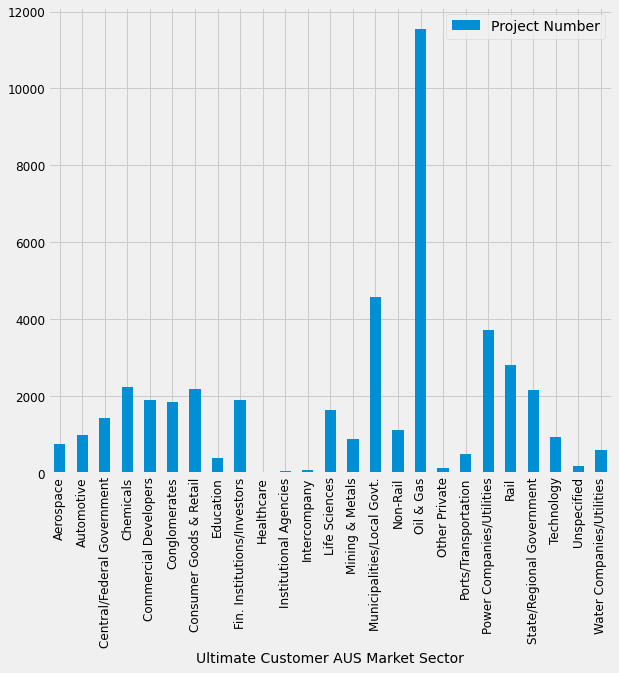

In [36]:
analysis('Ultimate Customer AUS Market Sector')

### Which are the most common Arcadis Divisions ?

['Infrastructure' 'Environment' 'Water' 'Enabling Function']


<AxesSubplot:xlabel='Division Short Name'>

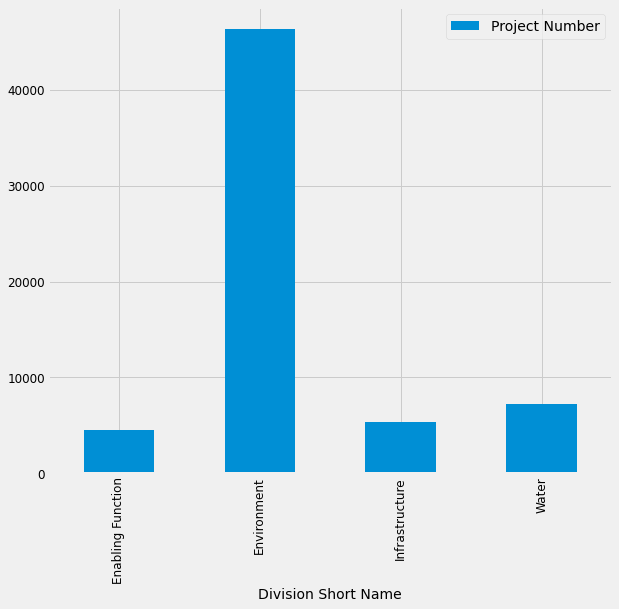

In [20]:
analysis('Division Short Name')

In [22]:
f" There are {len(df1['SalesCloudClientNo'].unique())} unique clients"


' There are 63522 unique projects'

In [23]:
f" There are {len(df1['Project Number'].unique())} unique projects"

' There are 63522 unique projects'

### What are the detailed project types?

[nan 'Site Evaluation and Restoration' 'Water Supply and Treatment'
 'Water Management' 'Environmental Planning' 'Program Management (PM)'
 'Rail & Urban Transport' 'Strategic Environmental Consulting'
 'Highways & ITS' 'Master Planning & Sustainable Urban Development'
 'Conveyance' 'Water for Industry' 'Environmental Construction Services'
 'Performance Driven Engineering (PDE)' 'Business Advisory'
 'Airport Solutions' 'Ports and Industrial Infrastructure Solutions'
 'Mining Solutions' 'GRIP' 'Contract Solutions' 'Cost Management (CM)'
 'Commercially Led Program Management'
 'Performance Driven Architecture (PDA)' 'Overhead Project']


<AxesSubplot:xlabel='Proj_CVP'>

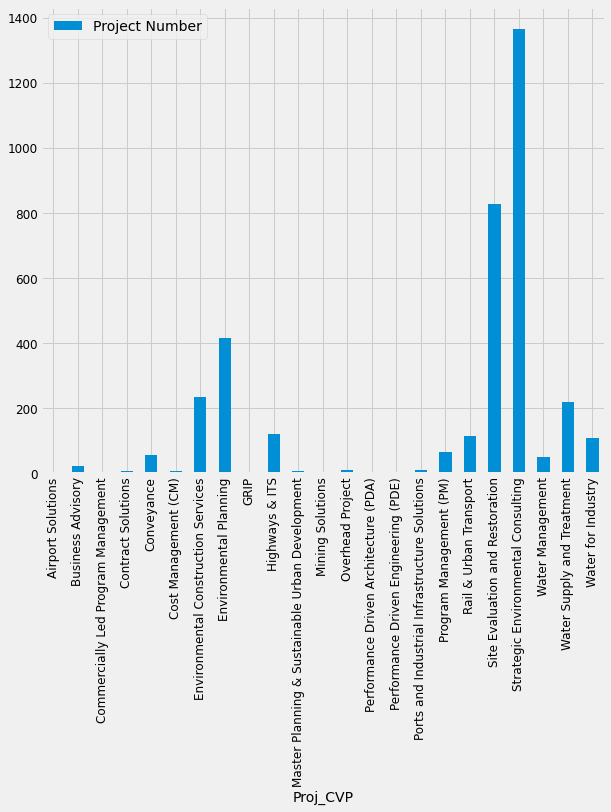

In [25]:
analysis('Proj_CVP')

### This is data from North America, where are most projects located?

['Georgia, US' 'Pennsylvania, US' 'Montana, US' 'New York, US'
 'Illinois, US' 'Alabama, US' 'Ohio, US' 'California, US' 'Florida, US'
 'Missouri, US' 'Maryland, US' 'Michigan, US' 'Nevada, US' nan
 'Arizona, US' 'Tennessee, US' 'Texas, US' 'Wisconsin, US' 'Virginia, US'
 'North Dakota, US' 'New Mexico, US' 'Oregon, US' 'Alaska, US'
 'Massachusetts, US' 'Kentucky, US' 'Iowa, US' 'New Hampshire, US'
 'District of Columbia, US' 'Oklahoma, US' 'Indiana, US' 'Connecticut, US'
 'Delaware, US' 'West Virginia, US' 'Arkansas, US' 'North Carolina, US'
 'Wyoming, US' 'New Jersey, US' 'Louisiana, US' 'Mississippi, US'
 'Maine, US' 'South Carolina, US' 'Washington, US' 'Quebec, CA'
 'Colorado, US' 'Nebraska, US' 'Utah, US' 'British Columbia, CA'
 'Idaho, US' 'Kansas, US' 'Rhode Island, US' 'Hawaii, US' 'Alberta, CA'
 'Minnesota, US' 'NO' 'Puerto Rico, PR' 'Ontario, CA' 'MAH'
 'Saskatchewan, CA' 'NSW' 'QLD' 'LONDON' 'South Dakota, US'
 'Virgin Islands, US' 'LINCS' 'VIC' 'STAFFS' 'Unspecified'
 'New

<AxesSubplot:xlabel='Region'>

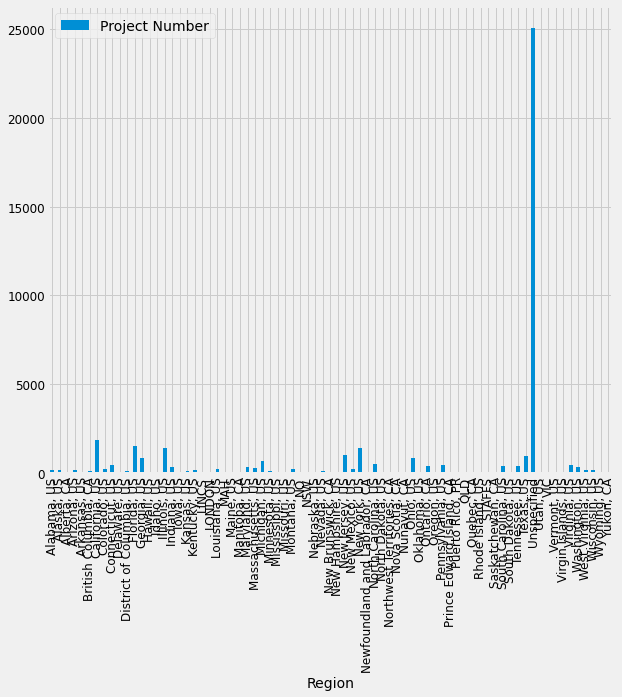

In [27]:
analysis('Region')

### Which are the most common client industries in detail?

['DOT - State Transportation' 'CP - Chem/Pharma' 'RL - Freight Rail'
 'EL - Technology, Telecomm & Electronics'
 'EE - Engineering, Environmental & Construction Management'
 'MU - Municipal' 'OG - Oil & Gas' 'AE - Aerospace'
 'PvtEd - Private Education' 'AU - Automotive' 'CR - Consumer & Retail'
 'PubEd - Public Education' 'IC - Arcadis Intercompany' 'PA - Pulp/Paper'
 'CONG - Conglomerate' 'PC - Power Companies/Utilities'
 'TRN - Transportation (Non-Rail Road)' 'IN - Internal'
 'CD - Commercial Developers' 'MM - Mining/Metals' 'CT - Contractors'
 'FIN - Financial' 'INS - Insurance' 'FED - Federal'
 'WC - Water Companies/Utilities' 'TS - Transit'
 'DC - Digital & Creative Industries' 'LOG - Logistics'
 'PPA - Ports/Public Authority' 'F&BP - Food & Bev Producers'
 'ST - State/Provinces' 'TC - Telecom Utilities' 'DOD - Dept of Defense'
 'PvtHC - Private Healthcare Institutions' 'NP - Non-Profit'
 'BLD - Building Materials & General Manufacturing'
 'PubHC - Public Healthcare Institutions'

<AxesSubplot:xlabel='primary_client_industry'>

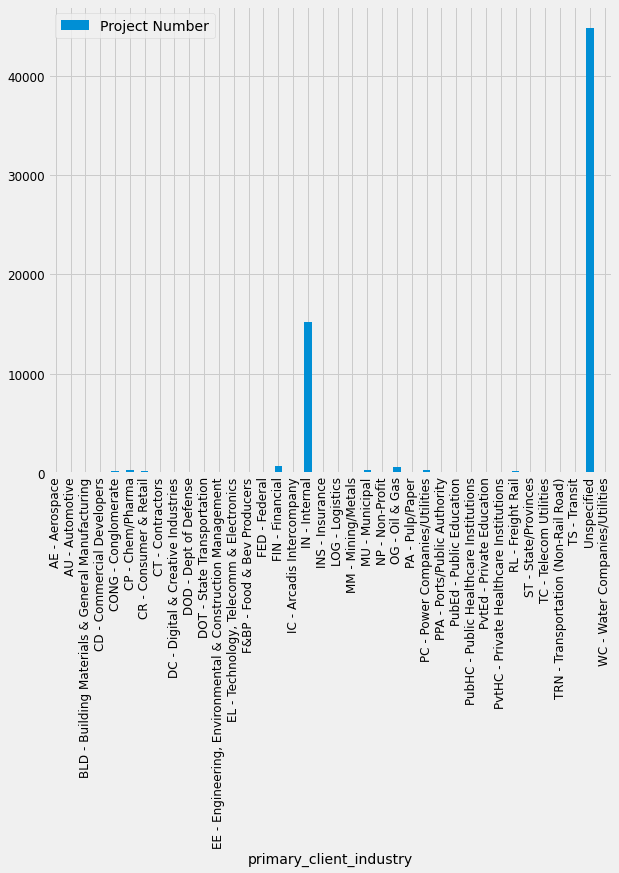

In [30]:
analysis('primary_client_industry')

### How is the risk distributed acorss projects?

['Unspecified' 'Medium' 'Low' 'High']


<AxesSubplot:xlabel='Risk Profile'>

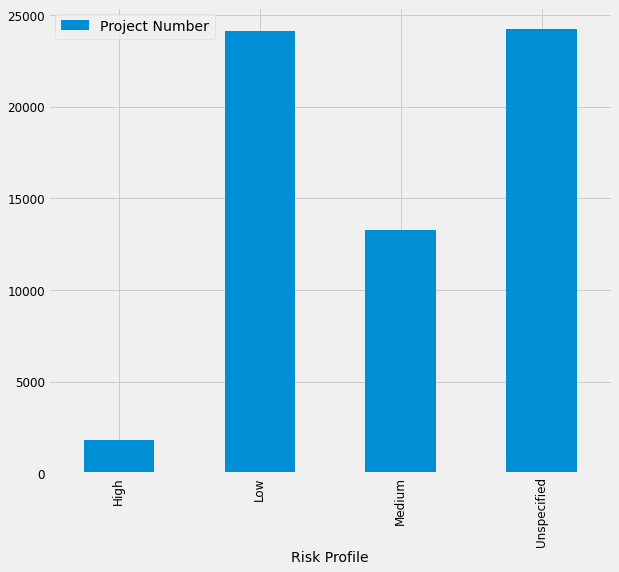

In [31]:
analysis('Risk Profile')

### What is the risk rating distribution?

[ 1.  2.  3.  5.  4. nan]


<AxesSubplot:xlabel='riskrating_project'>

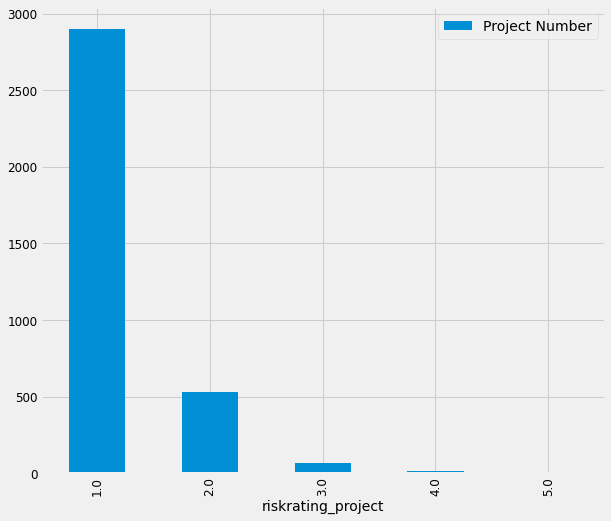

In [33]:
analysis('riskrating_project')

### How large are the Organizations that the company works with?

['RKC' 'Local' 'GKC' 'Key Regional' 'Key Local' 'Unspecified' 'Key Global']


<AxesSubplot:xlabel='Organization Size'>

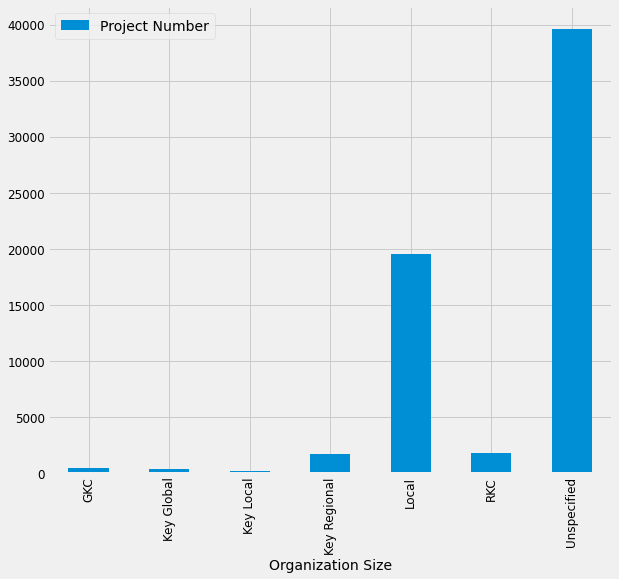

In [34]:
analysis('Organization Size')

In [12]:
def obtain_df(project):
    df_project = df[df['Project Number'] == project]
    df_project = df_project[["Fiscal Period Code", "Funding Amount - ITC (Snapshot)", "Backlog NR", 'Actual Gross Revenue - ITD', 'Actual Gross Revenue - MTD','Actual Gross Revenue - YTD', 'Actual Net Revenue - ITD','Actual Net Revenue - MTD', 'Actual Net Revenue - YTD']].copy()
    df_project['Backlog_Shifted'] = df_project['Backlog NR'].transform(lambda x:x.shift())
    df_project.reset_index(inplace=True)
    df_project = df_project.loc[:, ~df_project.columns.str.contains('^index')]
    return df_project

In [13]:
def obtain_timeseries(project):
    df_pn = obtain_df(project)
    df_pn = df_pn[['Fiscal Period Code', 'Project Number', 'Actual Net Revenue - MTD']].copy()
    df_pn = df_pn.set_index('Fiscal Period Code')
    return df_pn

In [15]:
df_gov_time = df_gov[['Fiscal Period Code', 'Project Number', 'Actual Net Revenue - MTD']].copy()
df_gov_time

,Fiscal Period Code,Project Number,Actual Net Revenue - MTD
494583,2019-07-01,30001658,-15.24
494584,2019-08-01,30001658,0.00
494585,2019-09-01,30001658,0.00
494586,2019-10-01,30001658,0.00
494587,2019-11-01,30001658,0.00
...,...,...,...
1204727,2020-11-01,30018209,0.00
1204728,2020-12-01,30018209,0.00
1204729,2021-01-01,30018209,0.00
1204730,2021-02-01,30018209,0.00


In [ ]:
# reshape the data to get values by time for each label
df = df_gov_time.pivot(index='Fiscal Period Code', columns='Project Number', values='value')

# Replace nans by forward filling existing values
df = df.fillna(method = 'ffill')

# You'll still have to handle the missing values in the beginning of the coloumns
df = df.fillna(method = 'bfill')